In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [6]:
calif_hsng_df = pd.read_csv("../datasets/housing.csv")

In [7]:
calif_hsng_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
calif_hsng_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1539,-122.04,37.88,32.0,3250.0,550.0,1230.0,557.0,4.6424,312700.0,NEAR BAY
15459,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,244900.0,NEAR OCEAN
1747,-122.36,37.96,30.0,950.0,317.0,1073.0,280.0,1.8664,107800.0,NEAR BAY
2214,-119.85,36.84,12.0,2272.0,304.0,840.0,305.0,8.9669,213900.0,INLAND
18190,-122.01,37.37,11.0,2559.0,694.0,1309.0,668.0,4.1847,167300.0,<1H OCEAN


In [9]:
calif_hsng_df.shape

(20640, 10)

In [10]:
calif_hsng_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
calif_hsng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
calif_hsng_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**** 

plotting scatter plots for pairwise relationships allows us to view the impact of certain features on house value.    

But its also possible that our features has some sort of interplay bw themselves i.e some kind of correlation. 

To view the correlation on the features we can use corr() method

**** 

In [15]:
correlation = calif_hsng_df.corr()
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


correlation is the measure that indiactes the extend to which two or more variables fluctuate together

the median_income &  median_house_value has a correlation of 0.68 which means they are positively correlated

also we can see that total_rooms is slightly positively correlated with median_house_value. 

This kindoff means that median_income is a better predictor of median_house_value as compared to total_rooms.

Rather than relying on raw numbers, correlation can be best visualized using heatmaps

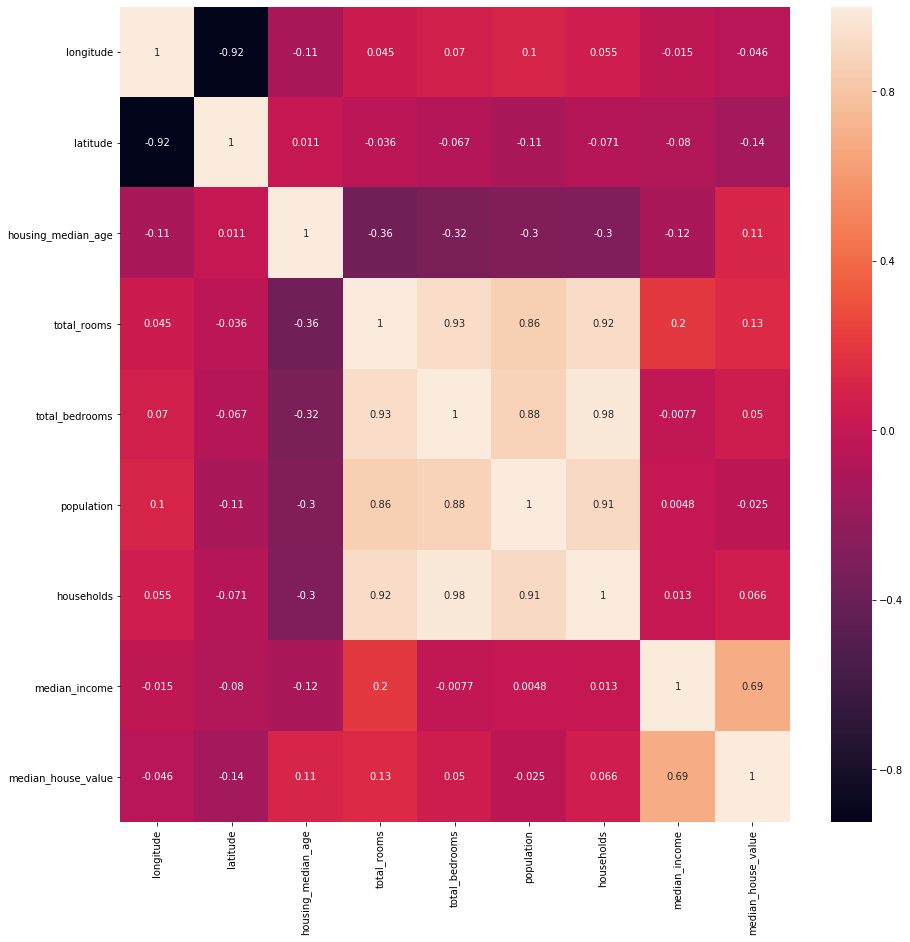

In [27]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlation,annot =True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()